In [ ]:
#Some Housekeeping

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Importing relevant libraries

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [ ]:
#Ignoring warnings for cleaner outputs

warnings.filterwarnings('ignore')

In [ ]:
#Downloading the dataset

!wget http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip

--2020-08-18 12:05:32--  http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 967382037 (923M) [application/zip]
Saving to: ‘ADEChallengeData2016.zip’

ADEChallengeData201 100%[===================>] 922.57M  3.86MB/s    in 5m 42s  

2020-08-18 12:11:15 (2.70 MB/s) - ‘ADEChallengeData2016.zip’ saved [967382037/967382037]



In [ ]:
#Unzipping the downloaded file

!unzip './ADEChallengeData2016.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00010086.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00002526.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00002954.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00007278.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00012415.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00012867.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00000612.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00016979.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00013255.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00013980.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00001052.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_0001

In [ ]:
#Removing the zipped file

os.remove('ADEChallengeData2016.zip')

In [ ]:
#Restructuring data for convenience

for filename in os.listdir('./ADEChallengeData2016/images/validation'):
  move_string = "./ADEChallengeData2016/images/validation/" + filename
  shutil.move(move_string, './ADEChallengeData2016/images/') 

for filename in os.listdir('./ADEChallengeData2016/images/training'):
  move_string = "./ADEChallengeData2016/images/training/" + filename
  shutil.move(move_string, './ADEChallengeData2016/images/') 

for filename in os.listdir('./ADEChallengeData2016/annotations/validation'):
  move_string = "./ADEChallengeData2016/annotations/validation/" + filename
  shutil.move(move_string, './ADEChallengeData2016/annotations/') 

for filename in os.listdir('./ADEChallengeData2016/annotations/training'):
  move_string = "./ADEChallengeData2016/annotations/training/" + filename
  shutil.move(move_string, './ADEChallengeData2016/annotations/') 

os.rmdir('./ADEChallengeData2016/images/validation')
os.rmdir('./ADEChallengeData2016/images/training') 
os.rmdir('./ADEChallengeData2016/annotations/validation') 
os.rmdir('./ADEChallengeData2016/annotations/training') 

In [ ]:
#Setting path variable

path = Path('.//ADEChallengeData2016')

In [ ]:
#Listing directories in path

path.ls()

[PosixPath('ADEChallengeData2016/sceneCategories.txt'),
 PosixPath('ADEChallengeData2016/images'),
 PosixPath('ADEChallengeData2016/annotations'),
 PosixPath('ADEChallengeData2016/objectInfo150.txt')]

In [ ]:
#Setting other path variables

path_ann = path/'annotations'
path_img = path/'images'

In [ ]:
#Retrieving some image filenames to check if the directory structure is correct

fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('ADEChallengeData2016/images/ADE_train_00011351.jpg'),
 PosixPath('ADEChallengeData2016/images/ADE_train_00013930.jpg'),
 PosixPath('ADEChallengeData2016/images/ADE_train_00011540.jpg')]

In [ ]:
#Retrieving some annotation filenames to check if the directory structure is correct

ann_names = get_image_files(path_ann)
ann_names[:3]

[PosixPath('ADEChallengeData2016/annotations/ADE_train_00005440.png'),
 PosixPath('ADEChallengeData2016/annotations/ADE_train_00004185.png'),
 PosixPath('ADEChallengeData2016/annotations/ADE_train_00011830.png')]

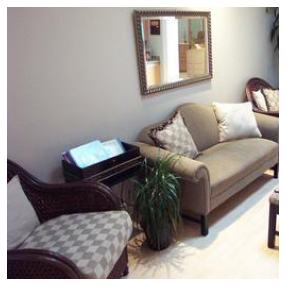

In [ ]:
#Displaying a sample image

img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [ ]:
#Lambda function to retrieve annotation filename from image filename

get_y_fn = lambda x: path/'annotations'/f'{x.stem}.png'

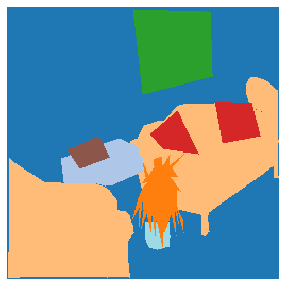

In [ ]:
#Displaying a sample mask

mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [ ]:
#Printing info regarding mask

src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([256, 256]), tensor([[[ 1,  1,  1,  ...,  1,  1,  0],
          [ 1,  1,  1,  ...,  1,  1,  0],
          [ 1,  1,  1,  ...,  1,  1,  0],
          ...,
          [ 0, 20, 20,  ...,  4,  4,  0],
          [ 0, 20, 20,  ...,  4,  4,  0],
          [ 0,  0,  4,  ...,  0,  0,  0]]]))

In [ ]:
#Retrieving codes/classnames

codes_int = [1]
with open('ADEChallengeData2016/objectInfo150.txt', newline = '') as object_info:
    reader = csv.reader(object_info, delimiter='\t')
    for obj in reader:
        codes_int = np.vstack((codes_int,obj[4])) 
codes_int = codes_int[2:]

codes = ['other objects']
for code in codes_int:
    codes = np.append(codes, code[0]) 

In [ ]:
#Printing codes

codes

array(['other objects', 'wall', 'building, edifice', 'sky', ..., 'radiator', 'glass, drinking glass', 'clock', 'flag'],
      dtype='<U113')

In [ ]:
#Setting batch size according to gpu memory

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=3, have 11430MB of GPU RAM free


In [ ]:
#Setting up src

src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(valid_pct=0.1)
       .label_from_func(get_y_fn, classes=codes))

In [ ]:
#Setting up data

data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

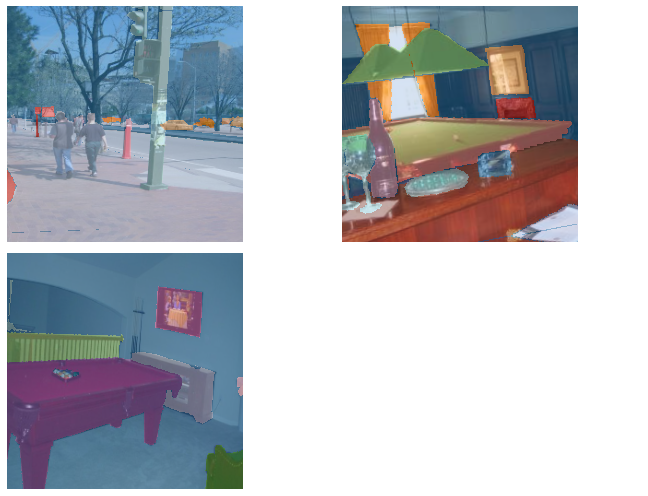

In [ ]:
#Displaying sample images with masks superimposed

data.show_batch(2, figsize=(10,7))

In [ ]:
#Defining and setting accuracy metric

name2id = {v:k for k,v in enumerate(codes)}

def acc_ADE(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

metrics=acc_ADE

In [ ]:
#Setting weight decay

wd=1e-2

In [ ]:
#Loading model

learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,acc_ADE,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


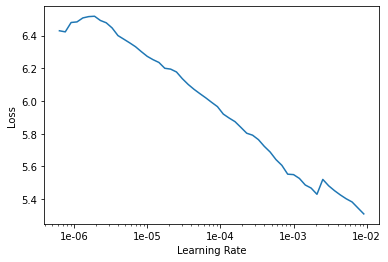

In [ ]:
#Finding the learning rate

lr_find(learn)
learn.recorder.plot()

In [ ]:
#Setting the learning rate

lr=1e-3

In [ ]:
#Fitting the model, fitting only one epoch, feel free to train for more as needed

learn.fit_one_cycle(1, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_ADE,time
0,1.582425,1.498278,0.617245,51:35


In [ ]:
#Saving the model

learn.save('stage-1')

In [ ]:
#Loading the model

learn.load('stage-1');

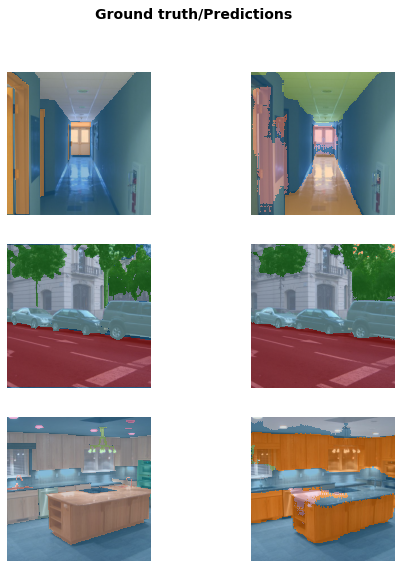

In [ ]:
#Displaying the predictions

learn.show_results(rows=3, figsize=(8,9))

In [ ]:
#Exporting the model

learn.export(file = Path('export.pkl'))